In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
inputs_n = 784
hidden_n = 100
output_n = 10

learning_rate = 0.01

In [9]:
class NeuralNetwork:
  def __init__(self, input_n, hidden_n, output_n, learning_rate=0.1):
    # set number of nodes in each input, hidden and output layer
    self.input_n = input_n
    self.hidden_n = hidden_n
    self.output_n = output_n

    # learning rate
    self.learning_rate = learning_rate

    # weights between input and hidden layers
    self.w_btw_input_hidden = np.random.normal(0.0, self.input_n**-0.5, (self.hidden_n, self.input_n))
    # weights between hidden and output layers
    self.w_btw_hidden_output = np.random.normal(0.0, self.hidden_n**-0.5, (self.output_n, self.hidden_n))

    # activation functions
    self.activation_function = lambda output: 1 / (1 + np.exp(-output)) # sigmoid function
  pass

  def train(self, inputs_list, targets_list):
    # convert lists to 2d Array
    inputs = np.array(inputs_list, ndmin=2).T
    targets = np.array(targets_list, ndmin=2).T 

    # training process

    # calculate signals into hidden layer
    hidden_inputs = np.dot(self.w_btw_input_hidden, inputs) 
    # calculate the signals emerging from hidden layer
    hidden_outputs = self.activation_function(hidden_inputs)
    # calculate signals into final output layer
    final_inputs = np.dot(self.w_btw_hidden_output, hidden_outputs)
    # calculate the signals emerging from final output layer
    final_outputs = self.activation_function(final_inputs)

    # backpropagation error

    # calculate the error
    output_errors = targets - final_outputs
    # hidden layer errors
    hidden_errors = np.dot(self.w_btw_hidden_output.T, output_errors)

    # update the weights between hidden and output layers
    self.w_btw_hidden_output += self.learning_rate * np.dot(output_errors * final_outputs * (1 - final_outputs), hidden_outputs.T)
    # update the weights between input and hidden layers
    self.w_btw_input_hidden += self.learning_rate * np.dot(hidden_errors * hidden_outputs * (1 - hidden_outputs), inputs.T)

    pass
  
  def query(self, inputs_list):
    # convert inputs list to 2d Array
    inputs = np.array(inputs_list, ndmin=2).T

    # calculate signals into hidden layer
    hidden_inputs = np.dot(self.w_btw_input_hidden, inputs)
    # calculate the moderated signals emerging from hidden layer
    hidden_outputs = self.activation_function(hidden_inputs)
    # calculate signals into final output_layer
    final_inputs = np.dot(self.w_btw_hidden_output, hidden_outputs)
    # calculate the moderated signals emerging from final output layer
    final_outputs = self.activation_function(final_inputs)

    return final_outputs

In [4]:
data_file  = open('mnist_datasets/mnist_train_100.csv', 'r')
data_list = data_file.readlines()
data_file.close()

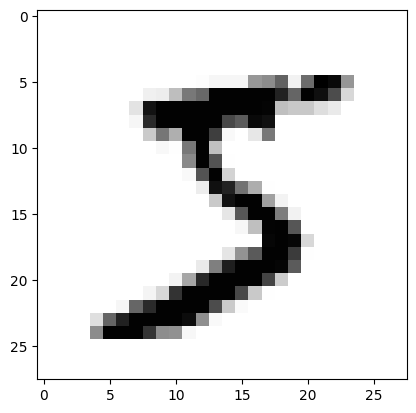

In [7]:
all_values_from_list = data_list[0].split(',')
image_pixels = np.asarray(all_values_from_list[1:], dtype=float).reshape((28, 28))
plt.imshow(image_pixels, cmap='Greys', interpolation='None')

In [12]:
inputs = data_list[0].split(',')
scaled_inputs = (np.asarray(inputs[1:], dtype=float) / 255.0 * 0.99) + 0.01

targets = np.zeros(output_n) + 0.01
targets[int(inputs[0])] = 0.99

In [20]:
# Training
nn = NeuralNetwork(inputs_n, hidden_n, output_n, learning_rate)

data_training_files = open('mnist_datasets/mnist_train_100.csv', 'r')
data_training_list = data_training_files.readlines()
data_training_files.close()

# training the neural network
# go through each record in the training data
epochs = 100
for e in range(epochs):
  for record in data_training_list:
    inputs = record.split(',')
    # scale and shift the inputs
    scaled_inputs = (np.asarray(inputs[1:], dtype=float) / 255.0 * 0.99) + 0.01
    # create the target output values (all 0.01, except the desired label which is 0.99)
    scaled_targets = np.zeros(output_n) + 0.01
    scaled_targets[int(inputs[0])] = 0.99

    # train the neural network
    nn.train(scaled_inputs, scaled_targets)
  pass
pass

In [21]:
# Testing
data_test_files = open('mnist_datasets/mnist_test_10.csv', 'r')
data_test_list = data_test_files.readlines()
data_test_files.close()

score_card = []
# go through each record in the test data
for record in data_test_list:
  inputs = record.split(',')
  correct_label = int(inputs[0])
  # scale and shift the inputs
  scaled_inputs = (np.asarray(inputs[1:], dtype=float) / 255.0 * 0.99) + 0.01
  # query the neural network
  outputs = nn.query(scaled_inputs)
  # the index of the highest value corresponds to the label
  label = np.argmax(outputs)
  print(f"Network's answer: {label}, correct answer: {correct_label}")
  if label == correct_label:
    score_card.append(1)
  else:
    score_card.append(0)
  pass
print(f"Performance = {np.mean(score_card) * 100}%")
pass


Network's answer: 7, correct answer: 7
Network's answer: 2, correct answer: 2
Network's answer: 1, correct answer: 1
Network's answer: 0, correct answer: 0
Network's answer: 4, correct answer: 4
Network's answer: 1, correct answer: 1
Network's answer: 9, correct answer: 4
Network's answer: 4, correct answer: 9
Network's answer: 4, correct answer: 5
Network's answer: 9, correct answer: 9
Performance = 70.0%
